In [1]:
import pandas as pd
from zipfile import ZipFile
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zf = ZipFile('8538_11952_bundle_archive.zip') 
test = pd.read_csv(zf.open('Test.csv'))
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
train = pd.read_csv(zf.open('Train.csv'))
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [7]:
train['Outlet_Size'] = train['Outlet_Size'].fillna('Unknown')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Unknown')

In [8]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [10]:
set(train['Item_Fat_Content'])

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [11]:
set(test['Item_Fat_Content'])

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [12]:
set(train['Item_Fat_Content'])

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [13]:
set(train['Item_Identifier'])

{'NCS17',
 'FDP01',
 'FDH52',
 'NCW06',
 'FDT14',
 'FDH10',
 'NCC31',
 'FDN21',
 'FDM15',
 'FDY55',
 'NCL30',
 'FDN45',
 'FDW55',
 'DRZ24',
 'NCO06',
 'FDD33',
 'FDJ41',
 'FDJ28',
 'FDB46',
 'NCR05',
 'FDX01',
 'NCI42',
 'FDV45',
 'FDK20',
 'FDO12',
 'FDG45',
 'FDN38',
 'FDO10',
 'FDN33',
 'FDO50',
 'NCB43',
 'FDI19',
 'FDO40',
 'FDU33',
 'FDQ28',
 'FDS20',
 'FDD23',
 'FDS14',
 'NCP05',
 'NCV42',
 'FDG09',
 'FDX40',
 'DRD12',
 'FDI12',
 'FDW12',
 'DRK11',
 'FDS56',
 'FDE28',
 'FDE47',
 'FDB03',
 'FDG35',
 'FDS39',
 'FDQ37',
 'FDQ27',
 'FDQ59',
 'FDI53',
 'FDM56',
 'FDJ26',
 'FDC51',
 'NCH06',
 'FDB28',
 'FDF58',
 'FDV25',
 'FDD50',
 'FDJ15',
 'NCC19',
 'NCQ06',
 'FDS57',
 'NCK53',
 'FDA15',
 'FDY45',
 'FDT28',
 'FDM45',
 'FDQ25',
 'NCO43',
 'FDK08',
 'FDK46',
 'FDX19',
 'NCS06',
 'FDG31',
 'NCN41',
 'FDC39',
 'FDR20',
 'FDQ47',
 'FDH58',
 'DRI59',
 'FDM12',
 'NCO26',
 'FDA25',
 'FDD17',
 'FDX58',
 'FDA20',
 'FDZ58',
 'NCF31',
 'FDO37',
 'FDX49',
 'NCR30',
 'NCY06',
 'NCV54',
 'NCX41',


In [14]:
def change_item(col):
    if col[:2] == 'FD':
        return 'Food'
    elif col[:2] == 'NC':
        return 'Non Consumables'
    else:
        return 'Dairy'

In [15]:
train['Item_Type'] = train['Item_Identifier'].apply(change_item)
test['Item_Type'] = test['Item_Identifier'].apply(change_item)

In [16]:
set(train['Item_Type'])

{'Dairy', 'Food', 'Non Consumables'}

In [17]:
set(train[train['Item_Type']=='Non Consumables']['Item_Fat_Content'])

{'LF', 'Low Fat', 'low fat'}

In [18]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Item_Type:
 Food               6125
Non Consumables    1599
Dairy               799
Name: Item_Type, dtype: int64


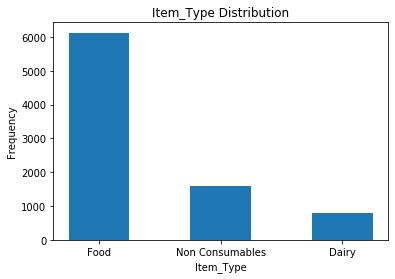

In [19]:
plt.bar(train['Item_Type'].value_counts().index, train['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Item_Type Distribution')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',train['Item_Type'].value_counts())

Item_Type:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


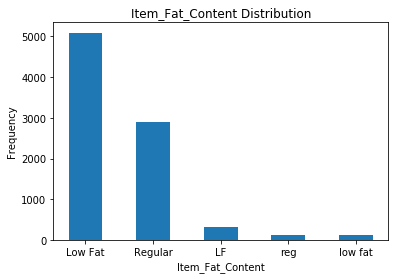

In [20]:
plt.bar(train['Item_Fat_Content'].value_counts().index, train['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Type:\n',train['Item_Fat_Content'].value_counts())

In [21]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [22]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('LF', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('low fat', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [23]:
train.loc[train['Item_Type']=='Non Consumables','Item_Fat_Content'] = 'Not Edible'

In [24]:
test.loc[test['Item_Type']=='Non Consumables','Item_Fat_Content'] = 'Not Edible'

In [25]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Dairy,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Food,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Not Edible,0.000000,Non Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Not Edible,0.035186,Non Consumables,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [26]:
nums = train.select_dtypes(include = [np.number])
nums.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [27]:
corr_nums = nums.corr()
corr_nums

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [28]:
nums

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [29]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [30]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.000000, train['Item_Visibility'].mean())

In [31]:
train['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
           ... 
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [32]:
test['Item_Visibility'] = test['Item_Visibility'].replace(0.000000, test['Item_Visibility'].mean())

In [33]:
test['Item_Visibility'].value_counts()

0.065684    353
0.084862      2
0.159195      2
0.014017      2
0.103864      2
           ... 
0.053802      1
0.101626      1
0.091380      1
0.060802      1
0.020601      1
Name: Item_Visibility, Length: 5277, dtype: int64

In [34]:
train = pd.get_dummies(train, prefix=['Col1', 'Col2','Col3','Col4'], columns=['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Type'])

In [35]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Col1_Low Fat,Col1_Not Edible,...,Col2_Food,Col2_Non Consumables,Col3_High,Col3_Medium,Col3_Small,Col3_Unknown,Col4_Grocery Store,Col4_Supermarket Type1,Col4_Supermarket Type2,Col4_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,Tier 1,3735.1380,1,0,...,1,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,Tier 3,443.4228,0,0,...,0,0,0,1,0,0,0,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,Tier 1,2097.2700,1,0,...,1,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.066132,182.0950,OUT010,1998,Tier 3,732.3800,0,0,...,1,0,0,0,0,1,1,0,0,0
4,NCD19,8.930,0.066132,53.8614,OUT013,1987,Tier 3,994.7052,0,1,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,Tier 3,2778.3834,1,0,...,1,0,1,0,0,0,0,1,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,Tier 2,549.2850,0,0,...,1,0,0,0,0,1,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,Tier 2,1193.1136,0,1,...,0,1,0,0,1,0,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,Tier 3,1845.5976,0,0,...,1,0,0,1,0,0,0,0,1,0


In [36]:
test = pd.get_dummies(test, prefix=['Col1', 'Col2','Col3','Col4'], columns=['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Type'])

In [37]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Col1_Low Fat,Col1_Not Edible,Col1_Regular,...,Col2_Food,Col2_Non Consumables,Col3_High,Col3_Medium,Col3_Small,Col3_Unknown,Col4_Grocery Store,Col4_Supermarket Type1,Col4_Supermarket Type2,Col4_Supermarket Type3
0,FDW58,20.750000,0.007565,107.8622,OUT049,1999,Tier 1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,FDW14,8.300000,0.038428,87.3198,OUT017,2007,Tier 2,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,NCN55,14.600000,0.099575,241.7538,OUT010,1998,Tier 3,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,OUT017,2007,Tier 2,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,FDY38,12.695633,0.118599,234.2300,OUT027,1985,Tier 3,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0.013496,141.3154,OUT046,1997,Tier 1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
5677,FDD47,7.600000,0.142991,169.1448,OUT018,2009,Tier 3,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5678,NCO17,10.000000,0.073529,118.7440,OUT045,2002,Tier 2,0,1,0,...,0,1,0,0,0,1,0,1,0,0
5679,FDJ26,15.300000,0.065684,214.6218,OUT017,2007,Tier 2,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [38]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Col1_Low Fat',
       'Col1_Not Edible', 'Col1_Regular', 'Col2_Dairy', 'Col2_Food',
       'Col2_Non Consumables', 'Col3_High', 'Col3_Medium', 'Col3_Small',
       'Col3_Unknown', 'Col4_Grocery Store', 'Col4_Supermarket Type1',
       'Col4_Supermarket Type2', 'Col4_Supermarket Type3'],
      dtype='object')

In [39]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Col1_Low Fat', 'Col1_Not Edible',
       'Col1_Regular', 'Col2_Dairy', 'Col2_Food', 'Col2_Non Consumables',
       'Col3_High', 'Col3_Medium', 'Col3_Small', 'Col3_Unknown',
       'Col4_Grocery Store', 'Col4_Supermarket Type1',
       'Col4_Supermarket Type2', 'Col4_Supermarket Type3'],
      dtype='object')

In [40]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Col1_Low Fat,Col1_Not Edible,...,Col2_Food,Col2_Non Consumables,Col3_High,Col3_Medium,Col3_Small,Col3_Unknown,Col4_Grocery Store,Col4_Supermarket Type1,Col4_Supermarket Type2,Col4_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,Tier 1,3735.1380,1,0,...,1,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,Tier 3,443.4228,0,0,...,0,0,0,1,0,0,0,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,Tier 1,2097.2700,1,0,...,1,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.066132,182.0950,OUT010,1998,Tier 3,732.3800,0,0,...,1,0,0,0,0,1,1,0,0,0
4,NCD19,8.930,0.066132,53.8614,OUT013,1987,Tier 3,994.7052,0,1,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,Tier 3,2778.3834,1,0,...,1,0,1,0,0,0,0,1,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,Tier 2,549.2850,0,0,...,1,0,0,0,0,1,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,Tier 2,1193.1136,0,1,...,0,1,0,0,1,0,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,Tier 3,1845.5976,0,0,...,1,0,0,1,0,0,0,0,1,0


In [41]:
train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Location_Type'],axis=1,inplace=True)

In [42]:
test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Location_Type'],axis=1,inplace=True)

In [43]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

In [44]:
x

,Item_Weight,Item_Visibility,Item_MRP,Col1_Low Fat,Col1_Not Edible,Col1_Regular,Col2_Dairy,Col2_Food,Col2_Non Consumables,Col3_High,Col3_Medium,Col3_Small,Col3_Unknown,Col4_Grocery Store,Col4_Supermarket Type1,Col4_Supermarket Type2,Col4_Supermarket Type3
0,9.300,0.016047,249.8092,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,0,0,1,1,0,0,0,1,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,19.200,0.066132,182.0950,0,0,1,0,1,0,0,0,0,1,1,0,0,0
4,8.930,0.066132,53.8614,0,1,0,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,0,0,1,0,1,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,0,0,1,0,1,0,0,0,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [45]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
x_test=StandardScaler().fit_transform(x_test)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
predictions1 = model1.predict(x_val)

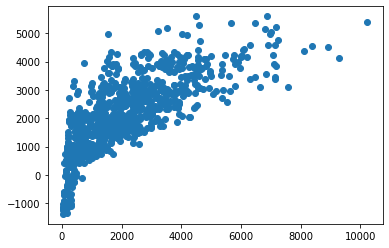

In [49]:
plt.scatter(y_val,predictions1)

In [50]:
from sklearn import metrics

In [51]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions1))

Mean Absolute Error:  805.2658452185964
Mean Squared Error:  1183211.4283076946
Root Mean Squared Error:  1087.755224445139
Explained Variance Score:  0.5768746271949627


In [52]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
model2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=76,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
predictions2=model2.predict(x_val)

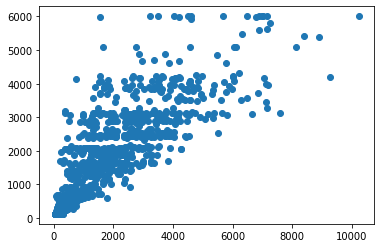

In [54]:
plt.scatter(y_val,predictions2)

In [55]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions2))

Mean Absolute Error:  721.6200652317586
Mean Squared Error:  1059902.9502690642
Root Mean Squared Error:  1029.5158815040515
Explained Variance Score:  0.6209048456382389


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [57]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)
predictions_rr = rr.predict(x_val)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(x_train, y_train)
predictions_rr100 = rr100.predict(x_val)

train_score=lr.score(x_train, y_train)
test_score=lr.score(x_val, y_val)

Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_val, y_val)

Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_val, y_val)

In [65]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.5609193823003827
linear regression test score: 0.5767978764001386
ridge regression train score low alpha: 0.5609229697216672
ridge regression test score low alpha: 0.5768313726361387
ridge regression train score high alpha: 0.5608249674880588
ridge regression test score high alpha: 0.5773912082398067


In [66]:
print('Mean Absolute Error for Ridge: ',metrics.mean_absolute_error(y_val,predictions_rr))
print('Mean Squared Error for Ridge: ',metrics.mean_squared_error(y_val,predictions_rr))
print('Root Mean Squared Error for Ridge: ',np.sqrt(metrics.mean_squared_error(y_val,predictions_rr)))
print('Explained Variance Score for Ridge: ',metrics.explained_variance_score(y_val,predictions_rr))

Mean Absolute Error for Ridge:  805.2831030527972
Mean Squared Error for Ridge:  1183117.7777160965
Root Mean Squared Error for Ridge:  1087.712175952856
Explained Variance Score for Ridge:  0.5768883011072179


In [67]:
print('Mean Absolute Error for Ridge: ',metrics.mean_absolute_error(y_val,predictions_rr100))
print('Mean Squared Error for Ridge: ',metrics.mean_squared_error(y_val,predictions_rr100))
print('Root Mean Squared Error for Ridge: ',np.sqrt(metrics.mean_squared_error(y_val,predictions_rr100)))
print('Explained Variance Score for Ridge: ',metrics.explained_variance_score(y_val,predictions_rr100))

Mean Absolute Error for Ridge:  803.7290043991347
Mean Squared Error for Ridge:  1181552.5590007487
Root Mean Squared Error for Ridge:  1086.9924374165391
Explained Variance Score for Ridge:  0.5774364361569887


In [61]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso()
lasso.fit(x_train,y_train)
predictions_lasso = lasso.predict(x_val)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_val,y_val)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)


lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
predictions_lasso001 = lasso001.predict(x_val)
train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_val,y_val)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)


lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
predictions_lasso00001 = lasso00001.predict(x_val)
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_val,y_val)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score: 0.5609193190334334
test score:  0.5767764170639681
number of features used:  13
training score for alpha=0.01: 0.5609229693899802
test score for alpha =0.01:  0.5768306553712422
number of features used: for alpha =0.01: 14
training score for alpha=0.0001: 0.5609229697226532
test score for alpha =0.0001:  0.5768312973151458
number of features used: for alpha =0.0001: 14


In [70]:
print('Mean Absolute Error for Lasso: ',metrics.mean_absolute_error(y_val,predictions_lasso))
print('Mean Squared Error for Lasso: ',metrics.mean_squared_error(y_val,predictions_lasso))
print('Root Mean Squared Error for Lasso: ',np.sqrt(metrics.mean_squared_error(y_val,predictions_lasso)))
print('Explained Variance Score for Lasso: ',metrics.explained_variance_score(y_val,predictions_lasso))

Mean Absolute Error for Lasso:  805.1909223871163
Mean Squared Error for Lasso:  1183271.4254825313
Root Mean Squared Error for Lasso:  1087.782802531154
Explained Variance Score for Lasso:  0.5768347295801282


In [71]:
print('Mean Absolute Error for Lasso with alpha=0.01: ',metrics.mean_absolute_error(y_val,predictions_lasso001))
print('Mean Squared Error for Lasso with alpha=0.01: ',metrics.mean_squared_error(y_val,predictions_lasso001))
print('Root Mean Squared Error for Lasso with alpha=0.01: ',np.sqrt(metrics.mean_squared_error(y_val,predictions_lasso001)))
print('Explained Variance Score for Lasso with alpha=0.01: ',metrics.explained_variance_score(y_val,predictions_lasso001))

Mean Absolute Error for Lasso with alpha=0.01:  805.2825215151473
Mean Squared Error for Lasso with alpha=0.01:  1183119.7830841593
Root Mean Squared Error for Lasso with alpha=0.01:  1087.7130977809172
Explained Variance Score for Lasso with alpha=0.01:  0.5768875995168654


In [72]:
print('Mean Absolute Error for Lasso with alpha=0.0001: ',metrics.mean_absolute_error(y_val,predictions_lasso00001))
print('Mean Squared Error for Lasso with alpha=0.0001: ',metrics.mean_squared_error(y_val,predictions_lasso00001))
print('Root Mean Squared Error for Lasso with alpha=0.0001: ',np.sqrt(metrics.mean_squared_error(y_val,predictions_lasso00001)))
print('Explained Variance Score for Lasso with alpha=0.0001: ',metrics.explained_variance_score(y_val,predictions_lasso00001))

Mean Absolute Error for Lasso with alpha=0.0001:  805.283284086029
Mean Squared Error for Lasso with alpha=0.0001:  1183117.9883026099
Root Mean Squared Error for Lasso with alpha=0.0001:  1087.7122727553503
Explained Variance Score for Lasso with alpha=0.0001:  0.5768882272008843
